In [1]:
import os
import os.path as osp
import sys
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def reduce_experimnet(values_list, idx):
    return [values[:idx] for values in values_list]


def plot_result(df, axs):

    ax = axs[0]
    ax.plot(df["m_over_n"], df["erm_mse"], marker=".", label="ERM", color="C0")
    ax.fill_between(
        df["m_over_n"],
        df["erm_mse_ci_lower"],
        df["erm_mse_ci_upper"],
        color="C0",
        alpha=0.1,
    )

    ax.plot(df["m_over_n"], df["net_mse"], marker=".", label="Net", color="C1")
    ax.fill_between(
        df["m_over_n"],
        df["net_mse_ci_lower"],
        df["net_mse_ci_upper"],
        color="C1",
        alpha=0.1,
    )

    ax.set_ylabel("Test MSE")
    values = np.append(df["erm_mse"], df["net_mse"])
    min_val, max_val = np.min(values), np.max(values)
    ax.set_ylim(min_val, max_val)
    ax.set_xlim(df["m_over_n"].iloc[0], df["m_over_n"].iloc[-1])

    ax = axs[1]
    ax.plot(df["m_over_n"], df["erm_train_mse"], marker=".", label="ERM", color="C0")
    ax.fill_between(
        df["m_over_n"],
        df["erm_train_mse_ci_lower"],
        df["erm_train_mse_ci_upper"],
        color="C0",
        alpha=0.1,
    )

    ax.plot(df["m_over_n"], df["net_train_mse"], marker=".", label="Net", color="C1")
    ax.fill_between(
        df["m_over_n"],
        df["net_train_mse_ci_lower"],
        df["net_train_mse_ci_upper"],
        color="C1",
        alpha=0.1,
    )

    ax.set_ylabel("Train MSE")
    values = np.append(df["erm_train_mse"], df["net_train_mse"])
    min_val, max_val = np.min(values), np.max(values)
    ax.set_ylim(min_val, max_val)
    ax.set_xlim(df["m_over_n"].iloc[0], df["m_over_n"].iloc[-1])

In [3]:
# Inputs
input_path = "../output/real_datal_20210701_070708"
out_dir = osp.join(input_path, "visualizations")
os.makedirs(out_dir, exist_ok=True)

sets = [
    "1028_SWD",
    "1030_ERA",
    "1196_BNG_pharynx",
    "1199_BNG_echoMonths",
    "1201_BNG_breastTumor",
    "215_2dplanes",
    "218_house_8L",
    "225_puma8NH",
    "229_pwLinear",
    "344_mv",
    "522_pm10",
    "537_houses",
    "542_pollution",
]

../output/real_datal_20210701_070708/1028_SWD.csv


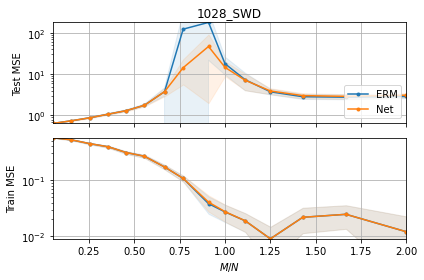

../output/real_datal_20210701_070708/1030_ERA.csv


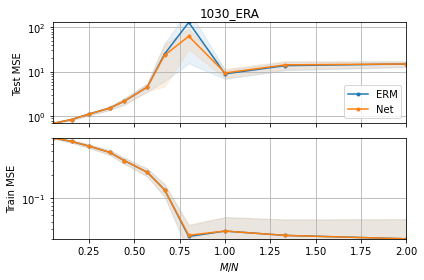

../output/real_datal_20210701_070708/1196_BNG_pharynx.csv


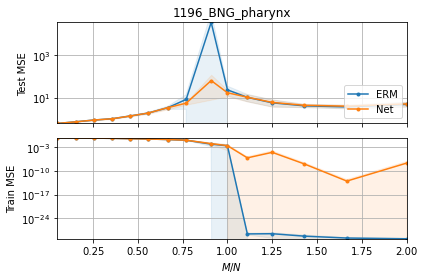

../output/real_datal_20210701_070708/1199_BNG_echoMonths.csv


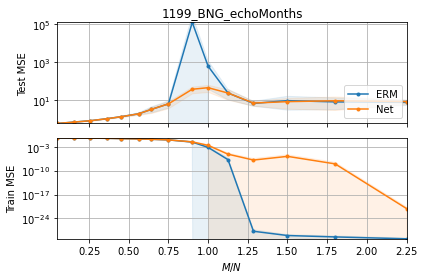

../output/real_datal_20210701_070708/1201_BNG_breastTumor.csv


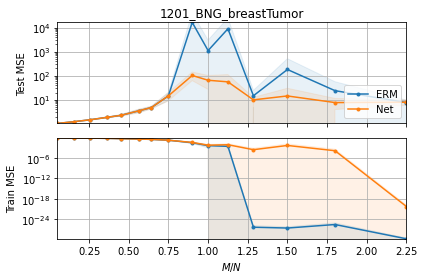

../output/real_datal_20210701_070708/215_2dplanes.csv


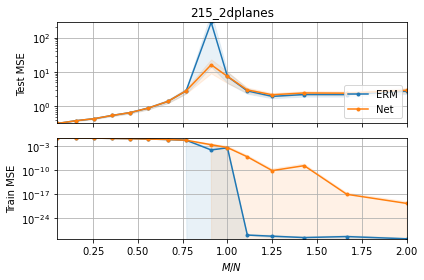

In [4]:
csv_paths = sorted(glob(osp.join(input_path, "*.csv")))
csv_paths = list(filter(lambda x: any([set_i in x for set_i in sets]), csv_paths))


for csv_path in csv_paths:
    print(csv_path)
    df = pd.read_csv(csv_path)
    set_name = osp.basename(csv_path).replace(".csv", "")

    w, h = plt.rcParams.get("figure.figsize")
    fig, axs = plt.subplots(2, 1)
    plot_result(df, axs)

    ax = axs[1]
    axs[1].set_xlabel(r"$M/N$")
    axs[0].set_title(f"{set_name}")
    axs[0].legend(loc=4)
    axs[0].set_xticklabels([])
    [ax.grid() for ax in axs]
    [ax.set_yscale("log") for ax in axs]

    plt.tight_layout()
    plt.savefig(osp.join(out_dir, set_name + ".jpg"))
    plt.show()